# Instalación de dependencias

In [1]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Introducción

El objetivo de este LAB es predecir si un cliente responderá a una campaña de préstamo personal, usando un árbol de decisión. Para ello, aprendamos más acerca del contexto de los datos.

## 2. Dataset

_Thera Bank_ un banco estadounidense que tiene una base de clientes cada vez mayor. La mayoría de estos clientes son clientes "pasivos" (depositantes) con depósitos de diversa cuantía. El número de clientes que también son prestatarios (clientes activos) es bastante pequeño, y el banco está interesado en ampliar esta base rápidamente para conseguir más negocio de préstamos y, de paso, ganar más a través de los intereses de los préstamos. En concreto, la dirección quiere explorar formas de convertir a sus clientes de pasivo en clientes de préstamos personales (conservándolos como depositantes).

Una campaña que el banco llevó a cabo el año pasado para los clientes pasivo mostró una saludable tasa de conversión de más del 9% de éxito. Esto ha animado al departamento de marketing minorista a idear campañas con mejores objetivos de marketing para aumentar la tasa de éxito.

Como científico de datos en _Thera Bank_ tiene que construir un modelo que ayude al departamento de marketing a identificar a los clientes potenciales que tienen una mayor probabilidad de adquirir el préstamo.

### Información

* `ID`: ID del cliente
* `Age`: Edad del cliente en años cumplidos
* `Experience`: #Años de experiencia profesional
* `Income`: Ingresos anuales del cliente (en miles de dólares)
* `ZIP Code`: Código postal de la dirección del domicilio.
* `Family`: Tamaño de la familia del cliente
* `CCAvg`: Gasto medio mensual en tarjetas de crédito (en miles de dólares)
* `Education`: Nivel de educación. 1: No graduado; 2: Graduado;3: Avanzado/Profesional
* `Mortgage`: Valor de la hipoteca de la casa, si la tiene. (en miles de dólares)
* `Personal_Loan`: ¿Este cliente aceptó el préstamo personal ofrecido en la última campaña?
* `Securities_Account`: ¿Tiene el cliente una cuenta de valores en el banco?
* `CD_Account`: ¿El cliente tiene una cuenta de certificado de depósito (CD) en el banco?
* `Online`: ¿Utiliza el cliente servicios de banca por Internet?
* `CreditCard`: ¿Utiliza el cliente una tarjeta de crédito emitida por otro banco (excluido All life Bank)?

### Problema

* Predecir si un cliente "pasivo" comprará o no un préstamo personal.
* ¿Qué variables son más significativas?
* ¿A qué segmento de clientes hay que dirigirse más?
* ¿Influye la edad en la compra de préstamos por parte de los clientes?
* ¿Piden préstamos las personas con menos ingresos?

# 3. Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 4. Lectura y exploración inicial

In [2]:
df = pd.read_csv('../1_Datasets/3_Consumption/Bank_Personal_Professional_Data.csv')
df.head()

,ID,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Age,Family,ZIPCode,FirstName,LastName,Education,Experience,Income
0,1,1.6,0,0,1,0,0,0,25.0,4.0,91107.0,Wesley,Barrett,1,1,49
1,2,1.5,0,0,1,0,0,0,45.0,3.0,90089.0,Larry,Lewin,1,19,34
2,3,1.0,0,0,0,0,0,0,39.0,1.0,94720.0,Israel,Brady,1,15,11
3,4,2.7,0,0,0,0,0,0,35.0,1.0,94112.0,Nora,Quinn,2,9,100
4,5,1.0,0,0,0,0,0,1,35.0,4.0,91330.0,Jose,Crespo,2,8,45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   CCAvg              5000 non-null   float64
 2   Mortgage           5000 non-null   int64  
 3   PersonalLoan       5000 non-null   int64  
 4   SecuritiesAccount  5000 non-null   int64  
 5   CDAccount          5000 non-null   int64  
 6   Online             5000 non-null   int64  
 7   CreditCard         5000 non-null   int64  
 8   Age                5000 non-null   float64
 9   Family             5000 non-null   float64
 10  ZIPCode            5000 non-null   float64
 11  FirstName          5000 non-null   object 
 12  LastName           5000 non-null   object 
 13  Education          5000 non-null   int64  
 14  Experience         5000 non-null   int64  
 15  Income             5000 non-null   int64  
dtypes: float64(4), int64(10)

* No faltan valores en el conjunto de datos. 
* Todas las columnas son numéricas. 
* `Personal Loan` es la variable objetivo. 
* `Zipcode`, `Family`, `Education`, `Securities Account`, `CD_account`, `online`, `Credit card` son todas variables categóricas.

## 5. Data Preprocessing

La columna `ID` no es necesaria y puede eliminarse.

In [4]:
df.drop(columns= ['ID', 'FirstName', 'LastName'], inplace=True)
df.head()

,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Age,Family,ZIPCode,Education,Experience,Income
0,1.6,0,0,1,0,0,0,25.0,4.0,91107.0,1,1,49
1,1.5,0,0,1,0,0,0,45.0,3.0,90089.0,1,19,34
2,1.0,0,0,0,0,0,0,39.0,1.0,94720.0,1,15,11
3,2.7,0,0,0,0,0,0,35.0,1.0,94112.0,2,9,100
4,1.0,0,0,0,0,0,1,35.0,4.0,91330.0,2,8,45


# 6. Ingeniería de variables

### `Age`

La edad puede ser un factor vital a la hora de pedir un préstamo, por lo que conviene convertir las edades en *bins* para comprobar si existe algún patrón.

In [5]:
df['Agebin'] = pd.cut(df['Age'], 
                      bins = [0, 30, 40, 50, 60, 100], 
                      labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

### `Income`

Para comprender los segmentos de clientes, crearemos nuevas columnas que nos ayudarán a identificar si el cliente pertenece a un grupo de renta alta, media o baja.

In [6]:
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Bajo", "Medio", "Alto"],
)

### `Spending`

Para comprender el gasto de los clientes, se utilizan nuevas columnas que indican si el cliente pertenece a la categoría de gasto alto, medio o bajo.

In [7]:
df.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [8]:
df["Spending_group"] = pd.cut(x = df["CCAvg"], 
                              bins = [0, 0.7, 2.5, 10],
                              labels = ["Bajo", "Medio", "Alto"],
                              include_lowest = True,
                             )

### `Target`

([<matplotlib.patches.Wedge at 0x1bde230eb10>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

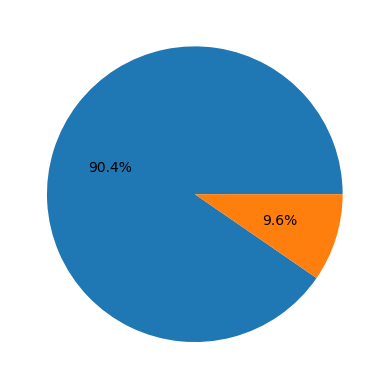

In [9]:
plt.pie(data=df, x=df["PersonalLoan"].value_counts(), autopct='%1.1f%%')

La variable objetivo `PersonalLoan` está muy desequilibrada, ya que sólo el 9,6% de los clientes del conjunto de datos han optado previamente por un préstamo personal. Esto puede tratarse utilizando SMOTE, pero por ahora seguiremos sin usarlo.

# 6. Modelo

## Preparación

In [10]:
columns = [
    'Agebin',
    'Income_group',
    'Spending_group',
    'PersonalLoan'
]

df = df[columns]
df

,Agebin,Income_group,Spending_group,PersonalLoan
0,18-30,Bajo,Medio,0
1,41-50,Bajo,Medio,0
2,31-40,Bajo,Medio,0
3,31-40,Medio,Alto,0
4,31-40,Bajo,Medio,0
...,...,...,...,...
4995,18-30,Bajo,Medio,0
4996,18-30,Bajo,Bajo,0
4997,60-100,Bajo,Bajo,0
4998,60-100,Bajo,Bajo,0


In [11]:
X = df.drop('PersonalLoan', axis=1)
y = df['PersonalLoan']

In [12]:
#oneHotCols=['Regions']
oneHotCols = X.select_dtypes(exclude='number').columns.to_list()

X = pd.get_dummies(X, columns=oneHotCols, drop_first=True)
X.head()

,Agebin_31-40,Agebin_41-50,Agebin_51-60,Agebin_60-100,Income_group_Medio,Income_group_Alto,Spending_group_Medio,Spending_group_Alto
0,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False
3,True,False,False,False,True,False,False,True
4,True,False,False,False,False,False,True,False


## Entrenamiento

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
modelo_base = DecisionTreeClassifier(criterion = 'gini', 
                                     class_weight = {0:0.15, 1:0.85}, 
                                     random_state = 1)
modelo_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

## Visualización del modelo

In [15]:
feature_names = list(X.columns)
print(feature_names)

['Agebin_31-40', 'Agebin_41-50', 'Agebin_51-60', 'Agebin_60-100', 'Income_group_Medio', 'Income_group_Alto', 'Spending_group_Medio', 'Spending_group_Alto']


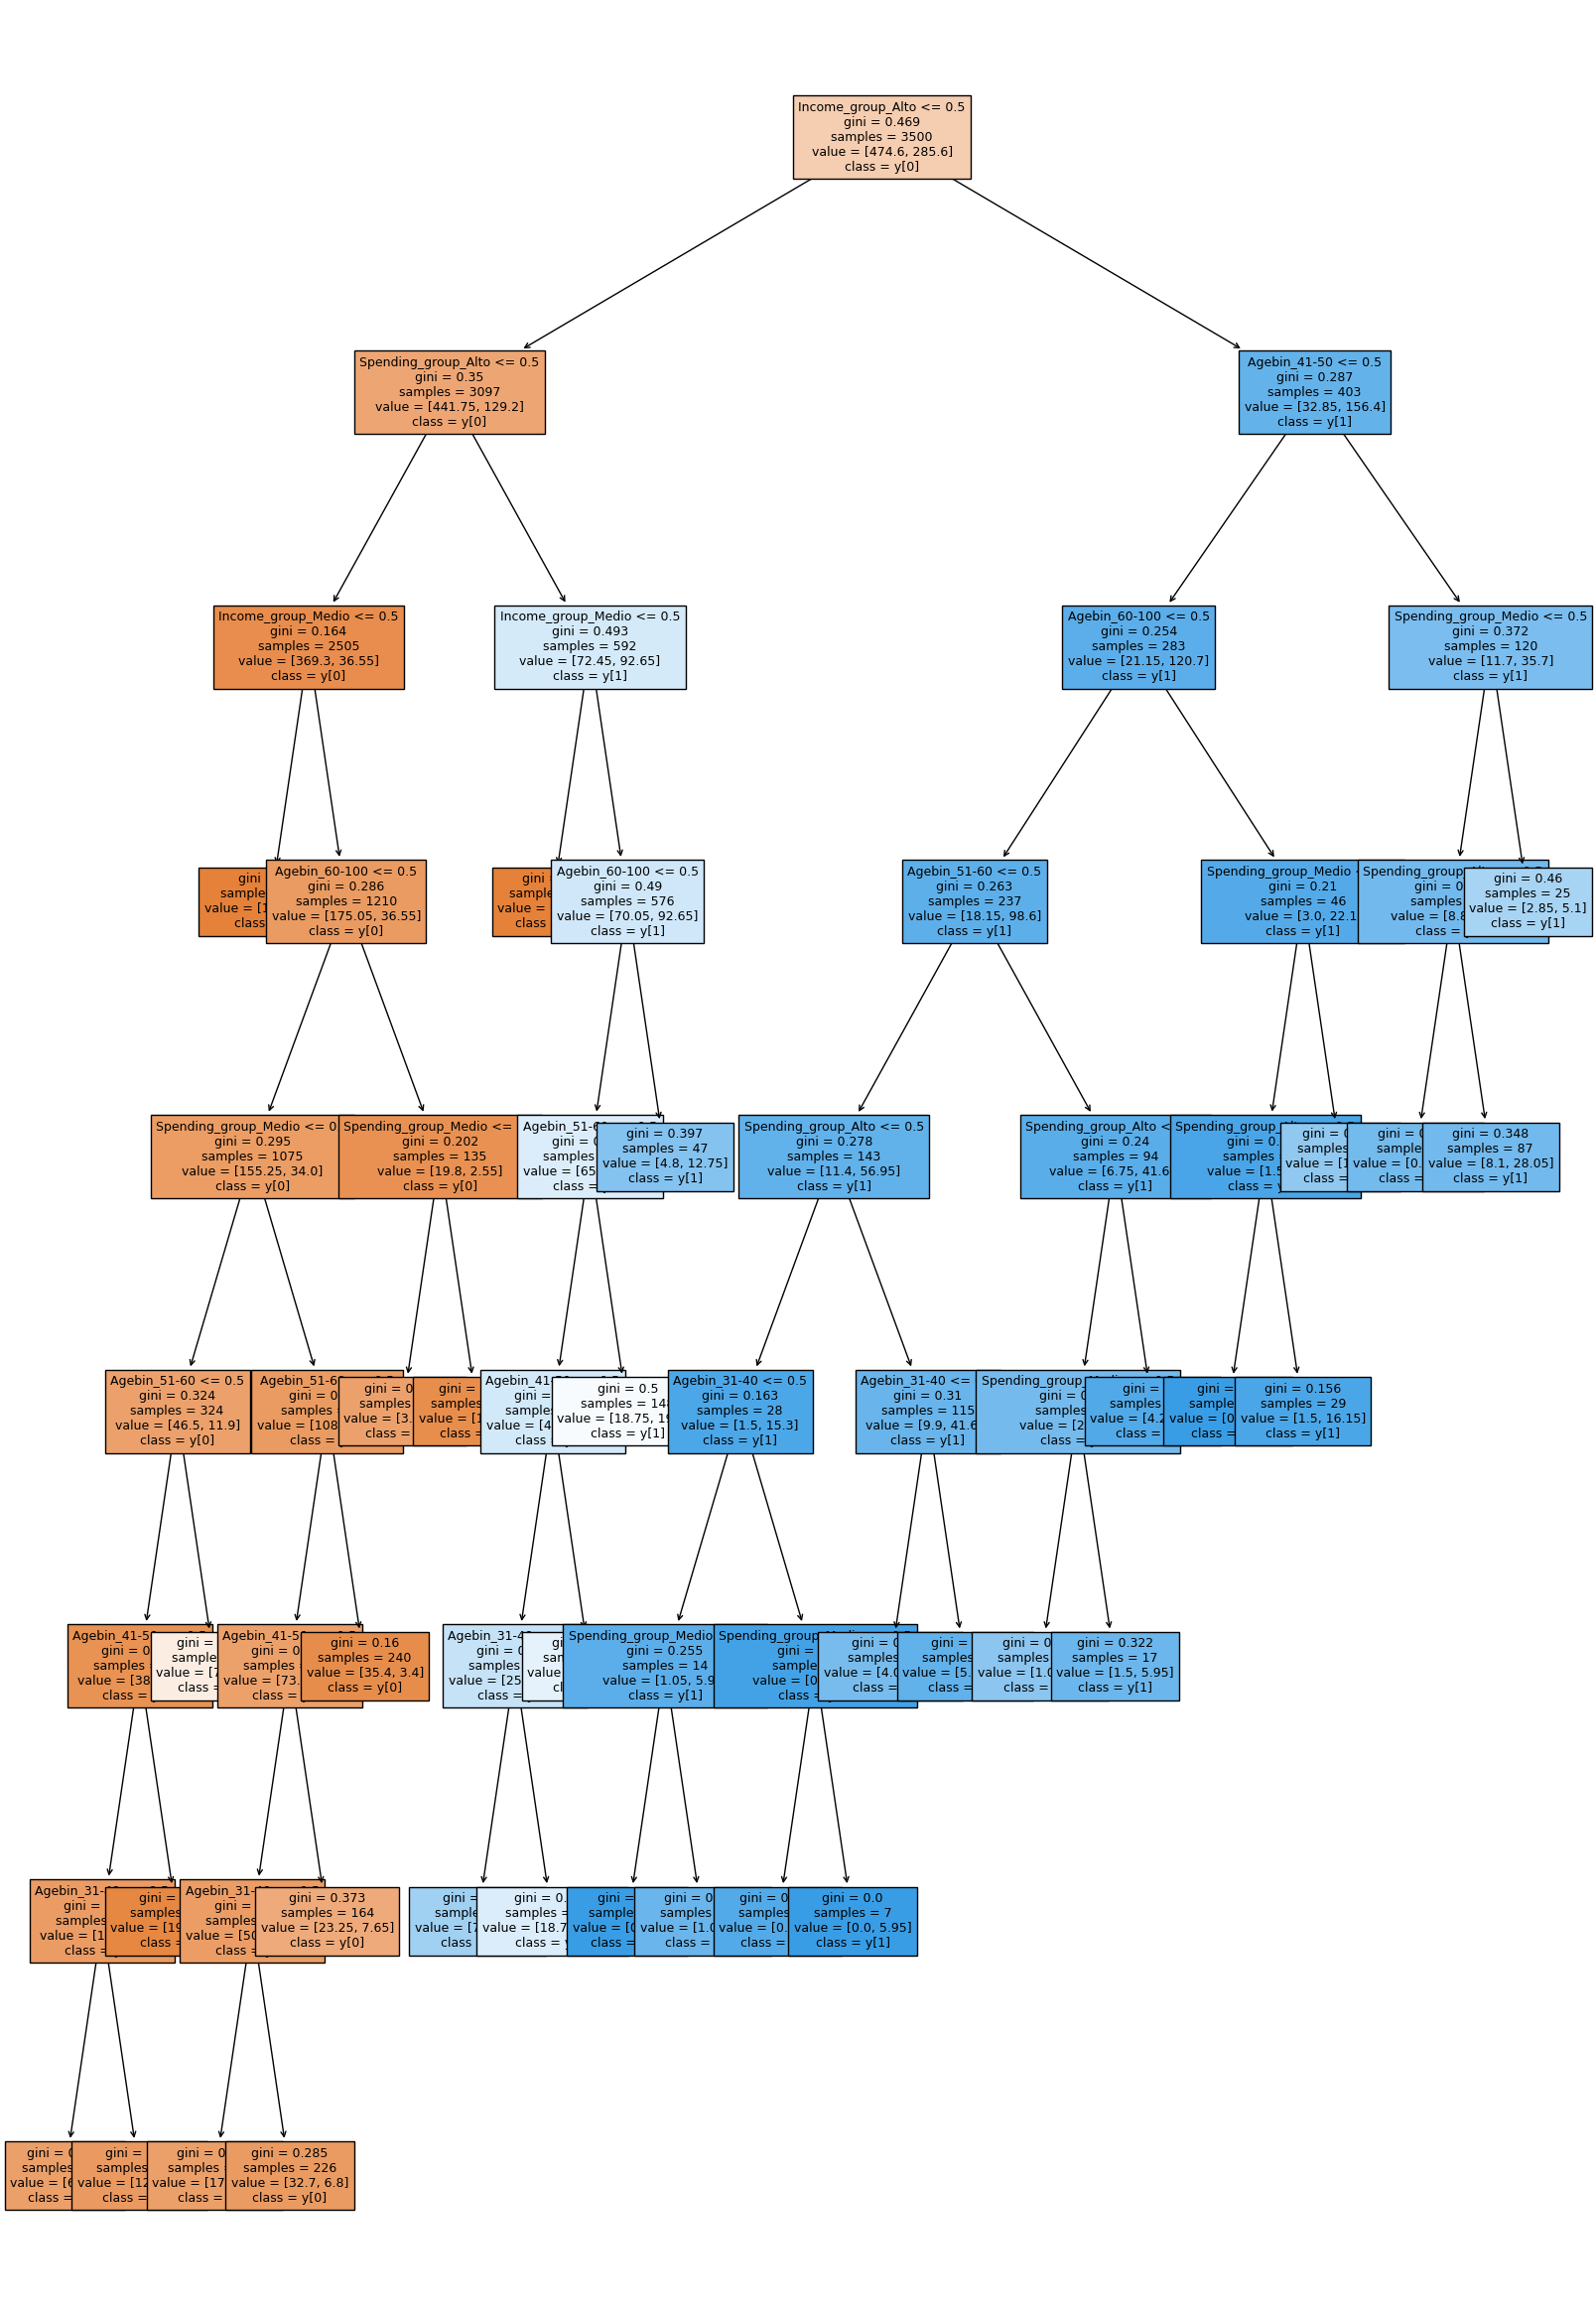

In [25]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(modelo_base, 
                     feature_names=feature_names, 
                     filled=True, 
                     fontsize=9,
                     class_names=True)

plt.show()

# Guardar modelo

In [17]:
model_path = '../4_Model/decission_tree.sav'

pickle.dump(modelo_base, open(model_path, 'wb'))

# Cargar modelo

In [19]:
loaded_model = pickle.load(open(model_path, 'rb'))

# Hacer predicciones con el modelo

In [24]:
X.iloc[0]

Agebin_31-40            False
Agebin_41-50            False
Agebin_51-60            False
Agebin_60-100           False
Income_group_Medio      False
Income_group_Alto       False
Spending_group_Medio     True
Spending_group_Alto     False
Name: 0, dtype: bool

In [34]:
new_data = [
    [False, False, False, False, False, False, True, False],
    [False, False, True, False, False, True, False, False]
]

In [35]:
# 0 = No prestamo, 1 = Si prestamo
loaded_model.predict(new_data)

c:\Venv\sciencity\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)